# Data for multiple soccer leagues

## Statistics for LaLiga (Spanish League)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np
from sklearn.linear_model import LinearRegression

response = requests.get("https://www.statbunker.com/competitions/PlayerStandings?comp_id=622")

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

#### Web scraping for LaLiga data and cleaning

Here we are gathering the data for all players (except goalkeepers) in the league by web scraping the webpage (https://www.statbunker.com/competitions/PlayerStandings?comp_id=622):

In [3]:
laliga = []
items = soup.findAll("tr", {"class": ["Forward", "Midfielder", "Defender"]})

for players in items:
    name = players.find("td", "mob tdInline").contents[0]
    team = players.find("td", "nonMob").contents[0]
    pos = players.find("td", "nonMob").find_next("td").contents[0]
    appear = players.find("td", "nonMob").find_next("td").find_next("td").contents[0]
    goals = players.find("td", {"title": "Goals"}).contents[0]
    assists = players.find("td", {"title": "Assists"}).contents[0]
    yellow = players.find("td", {"title": "Yellow"}).contents[0]
    yellow_red = players.find("td", {"title": "Yellow-Red"}).contents[0]
    red = players.find("td", {"title": "Red"}).contents[0]

    laliga.append({
        "Name": name,
        "Team": team,
        "Position": pos,
        "Appearances": appear,
        "Goals": goals,
        "Assists": assists,
        "Yellow": yellow,
        "Yellow-Red": yellow_red,
        "Red": red,
        "League": "Laliga"
    }) 
    

Once the data is gathered, we created a data frame to visualize the data. This will make reading the data easier because the data will be put in a table format. 

In [4]:
df_laliga = pd.DataFrame(laliga)
df_laliga

,Name,Team,Position,Appearances,Goals,Assists,Yellow,Yellow-Red,Red,League
0,Inaki Williams,Athletic Bilbao,Forward,38,12,4,3,0,0,Laliga
1,Jorge Molina,Getafe,Forward,38,14,5,2,0,0,Laliga
2,Antoine Griezmann,Atletico Madrid,Forward,37,15,8,5,0,0,Laliga
3,Mikel Oyarzabal,Real Sociedad,Midfielder,37,13,2,2,0,0,Laliga
4,Borja Iglesias,Espanyol,Defender,37,17,3,5,0,0,Laliga
...,...,...,...,...,...,...,...,...,...,...
524,Gustavo Assuncao,Atletico Madrid,Midfielder,0,0,0,0,0,0,Laliga
525,Cristian Rodriguez,Atletico Madrid,Midfielder,0,0,0,0,0,0,Laliga
526,Juan Miranda,Barcelona,Defender,0,0,0,0,0,0,Laliga
527,Robert Gonzalez,Real Betis,Midfielder,0,0,0,0,0,0,Laliga


Once the data is placed into a data frame we cleaned the data by changing the data type of certain columns. We also use the describe() command to gather interesting information about our data like the mean, standard deviaiton, min, max, and quantiles.

In [5]:
df_laliga.Appearances = df_laliga.Appearances.astype(float)
df_laliga.Goals = df_laliga.Goals.astype(float)
df_laliga.Assists = df_laliga.Assists.astype(float)
df_laliga.Yellow = df_laliga.Yellow.astype(float)
df_laliga["Yellow-Red"] = df_laliga["Yellow-Red"].astype(float)
df_laliga.Red = df_laliga.Red.astype(float)
df_laliga.describe()

,Appearances,Goals,Assists,Yellow,Yellow-Red,Red
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,18.555766,1.805293,1.211720,3.517958,0.088847,0.058601
std,12.108459,3.568312,1.913017,3.411234,0.316300,0.250694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,20.000000,1.000000,0.000000,3.000000,0.000000,0.000000
75%,30.000000,2.000000,2.000000,5.000000,0.000000,0.000000
max,38.000000,36.000000,13.000000,16.000000,2.000000,2.000000


After cleaning the data and gathering some information we repeated the same process for 4 other leagues (MLS, Premier, Serie A, and Bundesliga).

## Statistics for MLS League (US League)

In [6]:
response = requests.get("https://www.statbunker.com/competitions/PlayerStandings?comp_id=632")
soup = BeautifulSoup(response.content, "html.parser")

##### Web Scraping for MLS League Data

In [7]:
mls = []
items = soup.findAll("tr", {"class": ["Forward", "Defender", "Midfielder"]})

for players in items:
    name = players.find("td", "mob tdInline").contents[0]
    team = players.find("td", "nonMob").contents[0]
    pos = players.find("td", "nonMob").find_next("td").contents[0]
    appear = players.find("td", "nonMob").find_next("td").find_next("td").contents[0]
    goals = players.find("td", {"title": "Goals"}).contents[0]
    assists = players.find("td", {"title": "Assists"}).contents[0]
    yellow = players.find("td", {"title": "Yellow"}).contents[0]
    yellow_red = players.find("td", {"title": "Yellow-Red"}).contents[0]
    red = players.find("td", {"title": "Red"}).contents[0]

    mls.append({
        "Name": name,
        "Team": team,
        "Position": pos,
        "Appearances": appear,
        "Goals": goals,
        "Assists": assists,
        "Yellow": yellow,
        "Yellow-Red": yellow_red,
        "Red": red,
        "League": "MLS"
    }) 
    

In [8]:
df_mls = pd.DataFrame(mls)
df_mls

,Name,Team,Position,Appearances,Goals,Assists,Yellow,Yellow-Red,Red,League
0,Carles Gil,New England Revolution,Midfielder,34,10,12,5,0,0,MLS
1,Jack Elliott,Philadelphia Union,Defender,34,2,0,4,0,0,MLS
2,Haris Medunjanin,Philadelphia Union,Midfielder,34,1,4,6,0,0,MLS
3,Keegan Rosenberry,Colorado Rapids,Defender,34,1,3,3,0,0,MLS
4,Steve Birnbaum,DC United,Defender,34,1,0,5,0,0,MLS
...,...,...,...,...,...,...,...,...,...,...
605,Samuel Junqua,Houston Dynamo,Defender,0,0,0,0,0,0,MLS
606,Matthew Hundley,Colorado Rapids,Forward,0,0,0,0,0,0,MLS
607,Adam Henley,Real Salt Lake,Defender,0,0,0,0,0,0,MLS
608,Wyatt Omsberg,Minnesota United,Midfielder,0,0,0,0,0,0,MLS


In [9]:
df_mls.Appearances = df_mls.Appearances.astype(float)
df_mls.Goals = df_mls.Goals.astype(float)
df_mls.Assists = df_mls.Assists.astype(float)
df_mls.Yellow = df_mls.Yellow.astype(float)
df_mls["Yellow-Red"] = df_mls["Yellow-Red"].astype(float)
df_mls.Red = df_mls.Red.astype(float)
df_mls.describe()

,Appearances,Goals,Assists,Yellow,Yellow-Red,Red
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,17.104918,1.972131,1.368852,2.354098,0.040984,0.100000
std,10.613163,3.613632,2.111042,2.517432,0.214328,0.316228
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.500000,0.000000,1.000000,2.000000,0.000000,0.000000
75%,27.000000,2.000000,2.000000,4.000000,0.000000,0.000000
max,34.000000,34.000000,13.000000,12.000000,2.000000,2.000000


## Statistics for Premier League (English League)

In [10]:
response = requests.get("https://www.statbunker.com/competitions/PlayerStandings?comp_id=614")
soup = BeautifulSoup(response.content, "html.parser")

In [11]:
premier = []
items = soup.findAll("tr", {"class": ["Forward", "Defender", "Midfielder"]})

for players in items:
    name = players.find("td", "mob tdInline").contents[0]
    team = players.find("td", "nonMob").contents[0]
    pos = players.find("td", "nonMob").find_next("td").contents[0]
    appear = players.find("td", "nonMob").find_next("td").find_next("td").contents[0]
    goals = players.find("td", {"title": "Goals"}).contents[0]
    assists = players.find("td", {"title": "Assists"}).contents[0]
    yellow = players.find("td", {"title": "Yellow"}).contents[0]
    yellow_red = players.find("td", {"title": "Yellow-Red"}).contents[0]
    red = players.find("td", {"title": "Red"}).contents[0]

    premier.append({
        "Name": name,
        "Team": team,
        "Position": pos,
        "Appearances": appear,
        "Goals": goals,
        "Assists": assists,
        "Yellow": yellow,
        "Yellow-Red": yellow_red,
        "Red": red,
        "League": "Premier"
    }) 
    

In [12]:
df_premier = pd.DataFrame(premier)
df_premier

,Name,Team,Position,Appearances,Goals,Assists,Yellow,Yellow-Red,Red,League
0,Luka Milivojevic,Crystal Palace,Midfielder,38,12,2,10,0,0,Premier
1,Virgil van Dijk,Liverpool,Defender,38,4,2,1,0,0,Premier
2,Nathan Ake,AFC Bournemouth,Defender,38,4,0,3,0,0,Premier
3,Cesar Azpilicueta,Chelsea,Defender,38,1,5,4,0,0,Premier
4,Ben Mee,Burnley,Defender,38,0,2,9,0,0,Premier
...,...,...,...,...,...,...,...,...,...,...
509,Kyle Taylor,AFC Bournemouth,Midfielder,0,0,0,0,0,0,Premier
510,Emile Smith Rowe,Arsenal,Midfielder,0,0,0,0,0,0,Premier
511,Josh Benson,Burnley,Midfielder,0,0,0,0,0,0,Premier
512,Dan Burn,Brighton & Hove Albion,Defender,0,0,0,0,0,0,Premier


In [13]:
df_premier.Appearances = df_premier.Appearances.astype(float)
df_premier.Goals = df_premier.Goals.astype(float)
df_premier.Assists = df_premier.Assists.astype(float)
df_premier.Yellow = df_premier.Yellow.astype(float)
df_premier["Yellow-Red"] = df_premier["Yellow-Red"].astype(float)
df_premier.Red = df_premier.Red.astype(float)
df_premier.describe()

,Appearances,Goals,Assists,Yellow,Yellow-Red,Red
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,18.902724,2.021401,1.443580,2.357977,0.035019,0.056420
std,12.426088,3.607650,2.249914,2.666715,0.194313,0.230956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,1.000000,1.000000,2.000000,0.000000,0.000000
75%,30.000000,2.000000,2.000000,4.000000,0.000000,0.000000
max,38.000000,22.000000,15.000000,14.000000,2.000000,1.000000


## Statistics for Serie A (Italian League)

In [14]:
response = requests.get("https://www.statbunker.com/competitions/PlayerStandings?comp_id=623")
soup = BeautifulSoup(response.content, "html.parser")

In [15]:
serie = []
items = soup.findAll("tr", {"class": ["Forward", "Defender", "Midfielder"]})

for players in items:
    name = players.find("td", "mob tdInline").contents[0]
    team = players.find("td", "nonMob").contents[0]
    pos = players.find("td", "nonMob").find_next("td").contents[0]
    appear = players.find("td", "nonMob").find_next("td").find_next("td").contents[0]
    goals = players.find("td", {"title": "Goals"}).contents[0]
    assists = players.find("td", {"title": "Assists"}).contents[0]
    yellow = players.find("td", {"title": "Yellow"}).contents[0]
    yellow_red = players.find("td", {"title": "Yellow-Red"}).contents[0]
    red = players.find("td", {"title": "Red"}).contents[0]

    serie.append({
        "Name": name,
        "Team": team,
        "Position": pos,
        "Appearances": appear,
        "Goals": goals,
        "Assists": assists,
        "Yellow": yellow,
        "Yellow-Red": yellow_red,
        "Red": red,
        "League": "Serie A"
    }) 

In [16]:
df_serie = pd.DataFrame(serie)
df_serie

,Name,Team,Position,Appearances,Goals,Assists,Yellow,Yellow-Red,Red,League
0,Francesco Caputo,Empoli,Forward,38,16,3,3,0,0,Serie A
1,Simone Iacoponi,Parma,Defender,38,0,0,4,0,0,Serie A
2,Christian Kouame,Genoa,Forward,38,4,5,4,0,0,Serie A
3,Fabio Quagliarella,Sampdoria,Forward,37,26,8,1,0,0,Serie A
4,Andrea Belotti,Torino,Forward,37,15,3,5,0,0,Serie A
...,...,...,...,...,...,...,...,...,...,...
555,Riccardo Montolivo,AC Milan,Midfielder,0,0,0,0,0,0,Serie A
556,Stefan Simic,AC Milan,Defender,0,0,0,0,0,0,Serie A
557,Niccolo Ricchi,Empoli,Defender,0,0,0,0,0,0,Serie A
558,Ivan Lakicevic,Genoa,Defender,0,0,0,0,0,0,Serie A


In [17]:
df_serie.Appearances = df_serie.Appearances.astype(float)
df_serie.Goals = df_serie.Goals.astype(float)
df_serie.Assists = df_serie.Assists.astype(float)
df_serie.Yellow = df_serie.Yellow.astype(float)
df_serie["Yellow-Red"] = df_serie["Yellow-Red"].astype(float)
df_serie.Red = df_serie.Red.astype(float)
df_serie.describe()

,Appearances,Goals,Assists,Yellow,Yellow-Red,Red
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,17.489286,1.760714,1.200000,3.023214,0.078571,0.075000
std,12.376758,3.259755,1.838565,2.994538,0.282282,0.270327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,29.000000,2.000000,2.000000,5.000000,0.000000,0.000000
max,38.000000,26.000000,11.000000,15.000000,2.000000,2.000000


## Statistics for Bundesliga (German League)

In [18]:
response = requests.get("https://www.statbunker.com/competitions/PlayerStandings?comp_id=620")
soup = BeautifulSoup(response.content, "html.parser")

In [19]:
bundesliga = []
items = soup.findAll("tr", {"class": ["Forward", "Defender", "Midfielder"]})

for players in items:
    name = players.find("td", "mob tdInline").contents[0]
    team = players.find("td", "nonMob").contents[0]
    pos = players.find("td", "nonMob").find_next("td").contents[0]
    appear = players.find("td", "nonMob").find_next("td").find_next("td").contents[0]
    goals = players.find("td", {"title": "Goals"}).contents[0]
    assists = players.find("td", {"title": "Assists"}).contents[0]
    yellow = players.find("td", {"title": "Yellow"}).contents[0]
    yellow_red = players.find("td", {"title": "Yellow-Red"}).contents[0]
    red = players.find("td", {"title": "Red"}).contents[0]

    bundesliga.append({
        "Name": name,
        "Team": team,
        "Position": pos,
        "Appearances": appear,
        "Goals": goals,
        "Assists": assists,
        "Yellow": yellow,
        "Yellow-Red": yellow_red,
        "Red": red,
        "League": "Bundesliga"
    }) 

In [20]:
df_bundesliga = pd.DataFrame(bundesliga)
df_bundesliga

,Name,Team,Position,Appearances,Goals,Assists,Yellow,Yellow-Red,Red,League
0,Maximillian Eggestein,Werder Bremen,Midfielder,36,5,6,4,0,0,Bundesliga
1,Joshua Kimmich,Bayern Munich,Midfielder,34,2,13,4,0,0,Bundesliga
2,Danny Da Costa,Eintracht Frankfurt,Defender,34,2,4,1,0,0,Bundesliga
3,Ludwig Augustinsson,Werder Bremen,Defender,34,1,4,5,0,0,Bundesliga
4,Matthias Zimmermann,Fortuna Dusseldorf,Midfielder,34,1,3,4,0,0,Bundesliga
...,...,...,...,...,...,...,...,...,...,...
466,Panzu Ernesto,Hertha BSC,Defender,0,0,0,0,0,0,Bundesliga
467,David Kopacz,VfB Stuttgart,Midfielder,0,0,0,0,0,0,Bundesliga
468,Mete Kaan Demir,Hannover 96,Forward,0,0,0,0,0,0,Bundesliga
469,Dominik Franke,VfL Wolfsburg,Defender,0,0,0,0,0,0,Bundesliga


In [21]:
df_bundesliga.Appearances = df_bundesliga.Appearances.astype(float)
df_bundesliga.Goals = df_bundesliga.Goals.astype(float)
df_bundesliga.Assists = df_bundesliga.Assists.astype(float)
df_bundesliga.Yellow = df_bundesliga.Yellow.astype(float)
df_bundesliga["Yellow-Red"] = df_bundesliga["Yellow-Red"].astype(float)
df_bundesliga.Red = df_bundesliga.Red.astype(float)
df_bundesliga.describe()

,Appearances,Goals,Assists,Yellow,Yellow-Red,Red
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,16.719745,2.025478,1.401274,2.142251,0.046709,0.042463
std,11.002225,3.428819,2.205004,2.164250,0.221082,0.201857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,1.000000,0.000000,2.000000,0.000000,0.000000
75%,27.000000,3.000000,2.000000,3.500000,0.000000,0.000000
max,36.000000,22.000000,14.000000,10.000000,2.000000,1.000000


## Overall Data Frame of the 5 Leagues

In [22]:
df = pd.concat([df_laliga, df_mls, df_premier, df_serie, df_bundesliga]).reset_index(drop=True)
df

,Name,Team,Position,Appearances,Goals,Assists,Yellow,Yellow-Red,Red,League
0,Inaki Williams,Athletic Bilbao,Forward,38.0,12.0,4.0,3.0,0.0,0.0,Laliga
1,Jorge Molina,Getafe,Forward,38.0,14.0,5.0,2.0,0.0,0.0,Laliga
2,Antoine Griezmann,Atletico Madrid,Forward,37.0,15.0,8.0,5.0,0.0,0.0,Laliga
3,Mikel Oyarzabal,Real Sociedad,Midfielder,37.0,13.0,2.0,2.0,0.0,0.0,Laliga
4,Borja Iglesias,Espanyol,Defender,37.0,17.0,3.0,5.0,0.0,0.0,Laliga
...,...,...,...,...,...,...,...,...,...,...
2679,Panzu Ernesto,Hertha BSC,Defender,0.0,0.0,0.0,0.0,0.0,0.0,Bundesliga
2680,David Kopacz,VfB Stuttgart,Midfielder,0.0,0.0,0.0,0.0,0.0,0.0,Bundesliga
2681,Mete Kaan Demir,Hannover 96,Forward,0.0,0.0,0.0,0.0,0.0,0.0,Bundesliga
2682,Dominik Franke,VfL Wolfsburg,Defender,0.0,0.0,0.0,0.0,0.0,0.0,Bundesliga


In [23]:
df.iloc[2682]

Name           Dominik Franke
Team            VfL Wolfsburg
Position             Defender
Appearances                 0
Goals                       0
Assists                     0
Yellow                      0
Yellow-Red                  0
Red                         0
League             Bundesliga
Name: 2682, dtype: object

In [24]:
df.Appearances = df.Appearances.astype(float)
df.Goals = df.Goals.astype(float)
df.Assists = df.Assists.astype(float)
df.Yellow = df.Yellow.astype(float)
df["Yellow-Red"] = df["Yellow-Red"].astype(float)
df.Red = df.Red.astype(float)
df.describe()

,Appearances,Goals,Assists,Yellow,Yellow-Red,Red
count,2684.000000,2684.000000,2684.000000,2684.000000,2684.000000,2684.000000
mean,17.747765,1.913934,1.322653,2.686662,0.058122,0.068182
std,11.736361,3.499168,2.065331,2.834580,0.250927,0.260824
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,1.000000,0.000000,2.000000,0.000000,0.000000
75%,28.000000,2.000000,2.000000,4.000000,0.000000,0.000000
max,38.000000,36.000000,15.000000,16.000000,2.000000,2.000000


## What Position Scores the Most Goals in each League

To determine which position scored the most in each league; we decided to start by seeing who scored the most goals in each league.

#### Who Scored the Most Goals in each League?

([<matplotlib.axis.XTick at 0x7f9e904c79b0>,
 [Text(0, 0, 'Lionel Messi'),
  Text(0, 0, 'Carlos Vela'),
  Text(0, 0, 'Mohamed Salah'),
  Text(0, 0, 'Fabio Quagliarella'),
  Text(0, 0, 'Robert Lewandowski')])

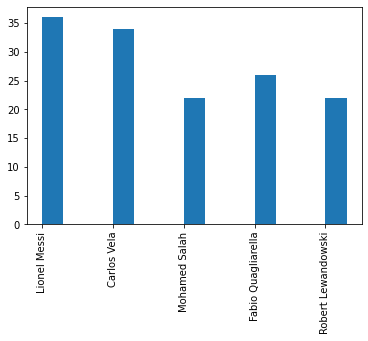

In [25]:
laliga_highest_score = df.iloc[df[df["League"] == "Laliga"].Goals.idxmax()]
mls_highest_score = df.iloc[df[df["League"] == "MLS"].Goals.idxmax()]
premier_highest_score = df.iloc[df[df["League"] == "Premier"].Goals.idxmax()]
serie_highest_score = df.iloc[df[df["League"] == "Serie A"].Goals.idxmax()]
bundesliga_highest_score = df.iloc[df[df["League"] == "Bundesliga"].Goals.idxmax()]

list_highest = [laliga_highest_score, mls_highest_score, premier_highest_score, serie_highest_score, bundesliga_highest_score]
list_highest_stats = {}

for items in list_highest:
    name = items.Name
    goals = items.Goals
    
    list_highest_stats.update({
        name: goals,
    })
    
list_highest_stats 

plt.bar(list_highest_stats.keys(), list_highest_stats.values(), align='edge', width=.3)
plt.xticks(range(len(list_highest_stats.values())), list_highest_stats.keys(), rotation=90)

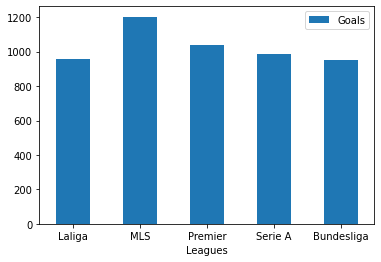

In [26]:
laliga_total = df[df["League"] == "Laliga"].Goals.sum()
mls_total = df[df["League"] == "MLS"].Goals.sum()
premier_total = df[df["League"] == "Premier"].Goals.sum()
serie_total = df[df["League"] == "Serie A"].Goals.sum()
bundesliga_total = df[df["League"] == "Bundesliga"].Goals.sum()

list_total = [laliga_total, mls_total, premier_total, serie_total, bundesliga_total]

list_total_df = pd.DataFrame({'Leagues':['Laliga', 'MLS', 'Premier', 'Serie A', 'Bundesliga'], 'Goals': list_total})
ax = list_total_df.plot.bar(x='Leagues', y='Goals', rot=0)

We can see that MLS league scores the most points out of the 5 leagues. This may indicate that either MLS players are better at scoring or that the defense is weaker compared to other leagues. The other leagues are about the same.

In [27]:
df_name = df.set_index('Name')
df_name.loc["Lionel Messi"]

Team           Barcelona
Position         Forward
Appearances           34
Goals                 36
Assists               13
Yellow                 3
Yellow-Red             0
Red                    0
League            Laliga
Name: Lionel Messi, dtype: object

In [28]:
df_name.loc["Carlos Vela"]

Team           Los Angeles FC
Position              Forward
Appearances                31
Goals                      34
Assists                    10
Yellow                      1
Yellow-Red                  0
Red                         0
League                    MLS
Name: Carlos Vela, dtype: object

In [29]:
df_name.loc["Mohamed Salah"]

Team           Liverpool
Position         Forward
Appearances           38
Goals                 22
Assists                8
Yellow                 1
Yellow-Red             0
Red                    0
League           Premier
Name: Mohamed Salah, dtype: object

In [30]:
df_name.loc["Fabio Quagliarella"]

Team           Sampdoria
Position         Forward
Appearances           37
Goals                 26
Assists                8
Yellow                 1
Yellow-Red             0
Red                    0
League           Serie A
Name: Fabio Quagliarella, dtype: object

In [31]:
df_name.loc["Robert Lewandowski"]

Team           Bayern Munich
Position             Forward
Appearances               33
Goals                     22
Assists                    7
Yellow                     2
Yellow-Red                 0
Red                        0
League            Bundesliga
Name: Robert Lewandowski, dtype: object

By looking at the graph and the data above we can see that the players that scored the most in each league are forwards which gives us the impresion that the position that scores the most is forward. However, to back this up we can get the total number of goals for each league 

#### Goals per positon LaLiga

In [32]:
goals_pos_laliga = df_laliga.groupby('Position')['Goals'].mean()
goals_pos_laliga

Position
Defender      0.735751
Forward       3.753731
Midfielder    1.534653
Name: Goals, dtype: float64

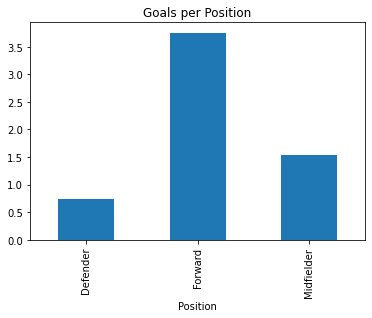

In [33]:
goals_pos_laliga.plot.bar(title='Goals per Position')

In [34]:
pos_count_laliga = df_laliga.groupby('Position')['Name'].count()
pos_count_laliga

Position
Defender      193
Forward       134
Midfielder    202
Name: Name, dtype: int64

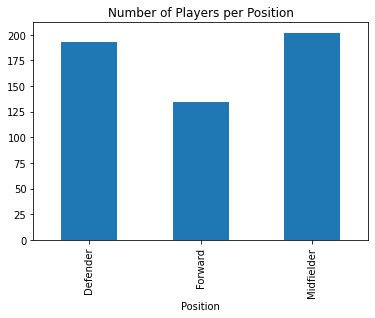

In [35]:
pos_count_laliga.plot.bar(title='Number of Players per Position')

#### Goals per position in the MLS

In [36]:
goals_pos_mls = df_mls.groupby('Position')['Goals'].mean()
goals_pos_mls

Position
Defender      0.460000
Forward       4.241379
Midfielder    1.871698
Name: Goals, dtype: float64

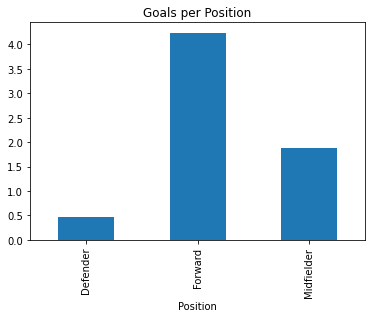

In [37]:
goals_pos_mls.plot.bar(title='Goals per Position')

In [38]:
pos_count_mls = df_mls.groupby('Position')['Name'].count()
pos_count_mls

Position
Defender      200
Forward       145
Midfielder    265
Name: Name, dtype: int64

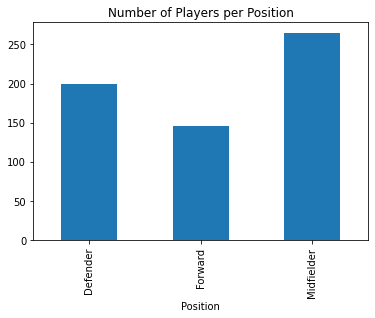

In [39]:
pos_count_mls.plot.bar(title='Number of Players per Position')

#### Goals per position in the Premier League

In [40]:
goals_pos_premier = df_premier.groupby('Position')['Goals'].mean()
goals_pos_premier

Position
Defender      0.694444
Forward       4.000000
Midfielder    2.124444
Name: Goals, dtype: float64

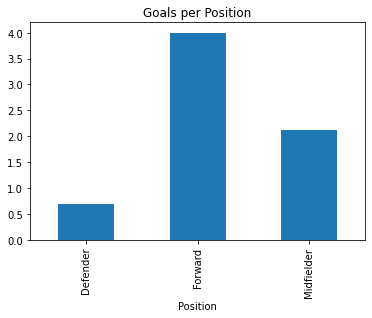

In [41]:
goals_pos_premier.plot.bar(title='Goals per Position')

In [42]:
pos_count_premier = df_premier.groupby('Position')['Name'].count()
pos_count_premier

Position
Defender      180
Forward       109
Midfielder    225
Name: Name, dtype: int64

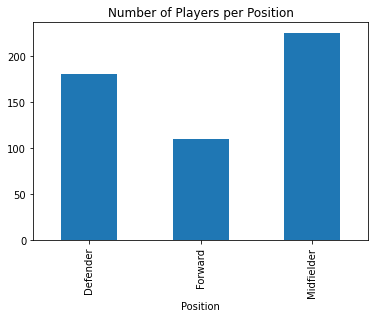

In [43]:
pos_count_premier.plot.bar(title='Number of Players per Position')

#### Goals per position in the Serie A

In [44]:
goals_pos_serie = df_serie.groupby('Position')['Goals'].mean()
goals_pos_serie

Position
Defender      0.823232
Forward       3.548872
Midfielder    1.532751
Name: Goals, dtype: float64

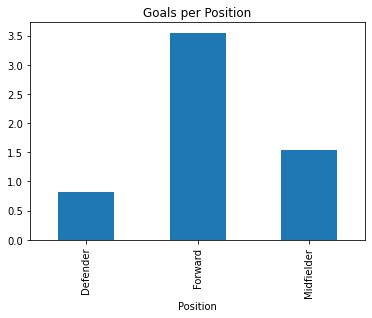

In [45]:
goals_pos_serie.plot.bar(title='Goals per Position')

In [46]:
pos_count_serie = df_serie.groupby('Position')['Name'].count()
pos_count_serie

Position
Defender      198
Forward       133
Midfielder    229
Name: Name, dtype: int64

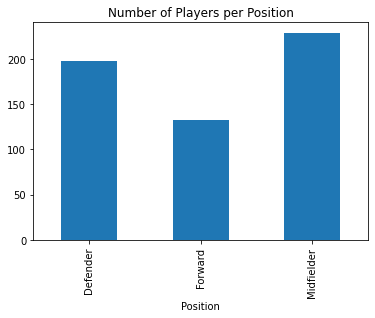

In [47]:
pos_count_serie.plot.bar(title='Number of Players per Position')

#### Goals per position in the Bundesliga

In [48]:
goals_pos_bundesliga = df_bundesliga.groupby('Position')['Goals'].mean()
goals_pos_bundesliga

Position
Defender      0.693750
Forward       4.051724
Midfielder    1.912821
Name: Goals, dtype: float64

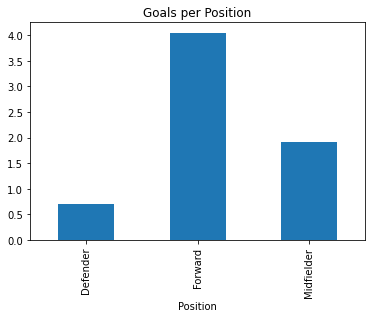

In [49]:
goals_pos_bundesliga.plot.bar(title='Goals per Position')

In [50]:
pos_count_bundesliga = df_bundesliga.groupby('Position')['Name'].count()
pos_count_bundesliga

Position
Defender      160
Forward       116
Midfielder    195
Name: Name, dtype: int64

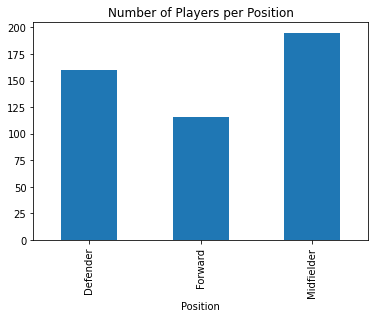

In [51]:
pos_count_bundesliga.plot.bar(title='Number of Players per Position')

## What position scores the most?

Here, we want to determine which position scores the most goals to determine if there is any correlation between the position and scoring goals. To determine which position scored the most goals we grouped the "Overall data frame of the 5 leagues" by the position and we summed all the goals scored. 

In [52]:
goals_pos = df.groupby('Position')['Goals'].sum()
goals_pos

Position
Defender       633.0
Forward       2496.0
Midfielder    2008.0
Name: Goals, dtype: float64

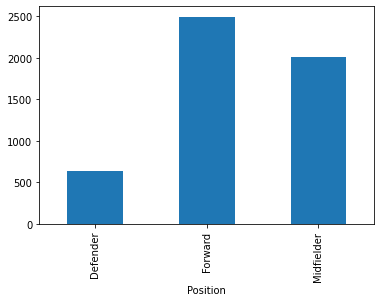

In [53]:
goals_pos.plot.bar()

By looking at the data and the graph above we can see that the position the scored the mose goals was the forward position. The results gives us a clear view that there is a correlation between the position you play and the amount of goals you scored. Since the forward players are the ones are supposed to nearest to the opponents goalie. However, we see that the midfielders where not actually that behind from the forwrds in terms of scoring goals. The midfielders are in charge of controling the game and giving passes to the forwards so that they can score, but we can see that is not always the case since the midfielders are scoring a lot of goals. Finally, the defenders score the least amount of goals since they are the once in charge to protect the goalie and not attacking.

#### Average goals per player in each position

However, just looking at the total number of goals by position is not enough since there might be more players in one position than another. To support the claim of which position scores the most we take the average of goals scored per player. To determine the average of goals scored per player we first have to get the total number of players in each position.

In [54]:
player_pos_count = df.groupby('Position')['Name'].count()
player_pos_count

Position
Defender       931
Forward        637
Midfielder    1116
Name: Name, dtype: int64

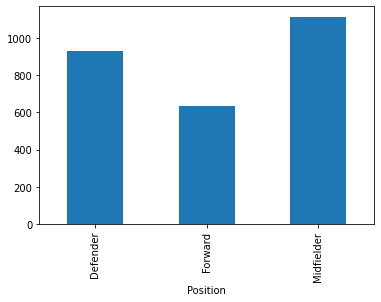

In [55]:
player_pos_count.plot.bar()

After getting the total number of players in each position we divide the total number of goals per position by the total number of players per position.

In [56]:
goals_pos/player_pos_count

Position
Defender      0.679914
Forward       3.918367
Midfielder    1.799283
dtype: float64

Looking at the data above we can claim that the position that scores the most goals is the forward position. We can see that the players in the forward position average almost 4 goals per player while the midfileders average almost 2 goals per player. Moreover, when we look at the bar garph of total number of players per position we can see that there are way more midfielders than forwards. In addition, when we look at the top scorers for each league we can see that all the players are forwards which gives us evidence that there is a correlation between the players position and scoring goals.

### La Liga League Linear Regression: Total Goals vs Year

Getting started by getting all the data for each year

In [57]:
response = requests.get("https://www.statbunker.com/competitions/PlayerStandings?comp_id=212")
soup = BeautifulSoup(response.content, "html.parser")

laliga_years = []

items = soup.findAll("tr", {"class": ["Forward", "Midfielder", "Defender"]})

for players in items:
    name = players.find("td", "mob tdInline").contents[0]
    team = players.find("td", "nonMob").contents[0]
    pos = players.find("td", "nonMob").find_next("td").contents[0]
    appear = players.find("td", "nonMob").find_next("td").find_next("td").contents[0]
    goals = players.find("td", {"title": "Goals"}).contents[0]
    assists = players.find("td", {"title": "Assists"}).contents[0]
    yellow = players.find("td", {"title": "Yellow"}).contents[0]
    yellow_red = players.find("td", {"title": "Yellow-Red"}).contents[0]
    red = players.find("td", {"title": "Red"}).contents[0]

    laliga_years.append({
        "Name": name,
        "Team": team,
        "Position": pos,
        "Appearances": appear,
        "Goals": goals,
        "Assists": assists,
        "Yellow": yellow,
        "Yellow-Red": yellow_red,
        "Red": red,
        "Year": "2007"
    }) 

In [58]:
response = requests.get("https://www.statbunker.com/competitions/PlayerStandings?comp_id=259")
soup = BeautifulSoup(response.content, "html.parser")

items = soup.findAll("tr", {"class": ["Forward", "Midfielder", "Defender"]})

for players in items:
    name = players.find("td", "mob tdInline").contents[0]
    team = players.find("td", "nonMob").contents[0]
    pos = players.find("td", "nonMob").find_next("td").contents[0]
    appear = players.find("td", "nonMob").find_next("td").find_next("td").contents[0]
    goals = players.find("td", {"title": "Goals"}).contents[0]
    assists = players.find("td", {"title": "Assists"}).contents[0]
    yellow = players.find("td", {"title": "Yellow"}).contents[0]
    yellow_red = players.find("td", {"title": "Yellow-Red"}).contents[0]
    red = players.find("td", {"title": "Red"}).contents[0]

    laliga_years.append({
        "Name": name,
        "Team": team,
        "Position": pos,
        "Appearances": appear,
        "Goals": goals,
        "Assists": assists,
        "Yellow": yellow,
        "Yellow-Red": yellow_red,
        "Red": red,
        "Year": "2008"
    }) 

In [59]:
response = requests.get("https://www.statbunker.com/competitions/PlayerStandings?comp_id=293")
soup = BeautifulSoup(response.content, "html.parser")

items = soup.findAll("tr", {"class": ["Forward", "Midfielder", "Defender"]})

for players in items:
    name = players.find("td", "mob tdInline").contents[0]
    team = players.find("td", "nonMob").contents[0]
    pos = players.find("td", "nonMob").find_next("td").contents[0]
    appear = players.find("td", "nonMob").find_next("td").find_next("td").contents[0]
    goals = players.find("td", {"title": "Goals"}).contents[0]
    assists = players.find("td", {"title": "Assists"}).contents[0]
    yellow = players.find("td", {"title": "Yellow"}).contents[0]
    yellow_red = players.find("td", {"title": "Yellow-Red"}).contents[0]
    red = players.find("td", {"title": "Red"}).contents[0]

    laliga_years.append({
        "Name": name,
        "Team": team,
        "Position": pos,
        "Appearances": appear,
        "Goals": goals,
        "Assists": assists,
        "Yellow": yellow,
        "Yellow-Red": yellow_red,
        "Red": red,
        "Year": "2009"
    }) 

In [60]:
response = requests.get("https://www.statbunker.com/competitions/PlayerStandings?comp_id=336")
soup = BeautifulSoup(response.content, "html.parser")

items = soup.findAll("tr", {"class": ["Forward", "Midfielder", "Defender"]})

for players in items:
    name = players.find("td", "mob tdInline").contents[0]
    team = players.find("td", "nonMob").contents[0]
    pos = players.find("td", "nonMob").find_next("td").contents[0]
    appear = players.find("td", "nonMob").find_next("td").find_next("td").contents[0]
    goals = players.find("td", {"title": "Goals"}).contents[0]
    assists = players.find("td", {"title": "Assists"}).contents[0]
    yellow = players.find("td", {"title": "Yellow"}).contents[0]
    yellow_red = players.find("td", {"title": "Yellow-Red"}).contents[0]
    red = players.find("td", {"title": "Red"}).contents[0]

    laliga_years.append({
        "Name": name,
        "Team": team,
        "Position": pos,
        "Appearances": appear,
        "Goals": goals,
        "Assists": assists,
        "Yellow": yellow,
        "Yellow-Red": yellow_red,
        "Red": red,
        "Year": "2010"
    }) 

In [61]:
response = requests.get("https://www.statbunker.com/competitions/PlayerStandings?comp_id=378")
soup = BeautifulSoup(response.content, "html.parser")

items = soup.findAll("tr", {"class": ["Forward", "Midfielder", "Defender"]})

for players in items:
    name = players.find("td", "mob tdInline").contents[0]
    team = players.find("td", "nonMob").contents[0]
    pos = players.find("td", "nonMob").find_next("td").contents[0]
    appear = players.find("td", "nonMob").find_next("td").find_next("td").contents[0]
    goals = players.find("td", {"title": "Goals"}).contents[0]
    assists = players.find("td", {"title": "Assists"}).contents[0]
    yellow = players.find("td", {"title": "Yellow"}).contents[0]
    yellow_red = players.find("td", {"title": "Yellow-Red"}).contents[0]
    red = players.find("td", {"title": "Red"}).contents[0]

    laliga_years.append({
        "Name": name,
        "Team": team,
        "Position": pos,
        "Appearances": appear,
        "Goals": goals,
        "Assists": assists,
        "Yellow": yellow,
        "Yellow-Red": yellow_red,
        "Red": red,
        "Year": "2011"
    }) 

In [62]:
response = requests.get("https://www.statbunker.com/competitions/PlayerStandings?comp_id=413")
soup = BeautifulSoup(response.content, "html.parser")

items = soup.findAll("tr", {"class": ["Forward", "Midfielder", "Defender"]})

for players in items:
    name = players.find("td", "mob tdInline").contents[0]
    team = players.find("td", "nonMob").contents[0]
    pos = players.find("td", "nonMob").find_next("td").contents[0]
    appear = players.find("td", "nonMob").find_next("td").find_next("td").contents[0]
    goals = players.find("td", {"title": "Goals"}).contents[0]
    assists = players.find("td", {"title": "Assists"}).contents[0]
    yellow = players.find("td", {"title": "Yellow"}).contents[0]
    yellow_red = players.find("td", {"title": "Yellow-Red"}).contents[0]
    red = players.find("td", {"title": "Red"}).contents[0]

    laliga_years.append({
        "Name": name,
        "Team": team,
        "Position": pos,
        "Appearances": appear,
        "Goals": goals,
        "Assists": assists,
        "Yellow": yellow,
        "Yellow-Red": yellow_red,
        "Red": red,
        "Year": "2012"
    }) 

In [63]:
response = requests.get("https://www.statbunker.com/competitions/PlayerStandings?comp_id=461")
soup = BeautifulSoup(response.content, "html.parser")

items = soup.findAll("tr", {"class": ["Forward", "Midfielder", "Defender"]})

for players in items:
    name = players.find("td", "mob tdInline").contents[0]
    team = players.find("td", "nonMob").contents[0]
    pos = players.find("td", "nonMob").find_next("td").contents[0]
    appear = players.find("td", "nonMob").find_next("td").find_next("td").contents[0]
    goals = players.find("td", {"title": "Goals"}).contents[0]
    assists = players.find("td", {"title": "Assists"}).contents[0]
    yellow = players.find("td", {"title": "Yellow"}).contents[0]
    yellow_red = players.find("td", {"title": "Yellow-Red"}).contents[0]
    red = players.find("td", {"title": "Red"}).contents[0]

    laliga_years.append({
        "Name": name,
        "Team": team,
        "Position": pos,
        "Appearances": appear,
        "Goals": goals,
        "Assists": assists,
        "Yellow": yellow,
        "Yellow-Red": yellow_red,
        "Red": red,
        "Year": "2013"
    }) 

In [64]:
response = requests.get("https://www.statbunker.com/competitions/PlayerStandings?comp_id=485")
soup = BeautifulSoup(response.content, "html.parser")

items = soup.findAll("tr", {"class": ["Forward", "Midfielder", "Defender"]})

for players in items:
    name = players.find("td", "mob tdInline").contents[0]
    team = players.find("td", "nonMob").contents[0]
    pos = players.find("td", "nonMob").find_next("td").contents[0]
    appear = players.find("td", "nonMob").find_next("td").find_next("td").contents[0]
    goals = players.find("td", {"title": "Goals"}).contents[0]
    assists = players.find("td", {"title": "Assists"}).contents[0]
    yellow = players.find("td", {"title": "Yellow"}).contents[0]
    yellow_red = players.find("td", {"title": "Yellow-Red"}).contents[0]
    red = players.find("td", {"title": "Red"}).contents[0]

    laliga_years.append({
        "Name": name,
        "Team": team,
        "Position": pos,
        "Appearances": appear,
        "Goals": goals,
        "Assists": assists,
        "Yellow": yellow,
        "Yellow-Red": yellow_red,
        "Red": red,
        "Year": "2014"
    }) 

In [65]:
response = requests.get("https://www.statbunker.com/competitions/PlayerStandings?comp_id=518")
soup = BeautifulSoup(response.content, "html.parser")

items = soup.findAll("tr", {"class": ["Forward", "Midfielder", "Defender"]})

for players in items:
    name = players.find("td", "mob tdInline").contents[0]
    team = players.find("td", "nonMob").contents[0]
    pos = players.find("td", "nonMob").find_next("td").contents[0]
    appear = players.find("td", "nonMob").find_next("td").find_next("td").contents[0]
    goals = players.find("td", {"title": "Goals"}).contents[0]
    assists = players.find("td", {"title": "Assists"}).contents[0]
    yellow = players.find("td", {"title": "Yellow"}).contents[0]
    yellow_red = players.find("td", {"title": "Yellow-Red"}).contents[0]
    red = players.find("td", {"title": "Red"}).contents[0]

    laliga_years.append({
        "Name": name,
        "Team": team,
        "Position": pos,
        "Appearances": appear,
        "Goals": goals,
        "Assists": assists,
        "Yellow": yellow,
        "Yellow-Red": yellow_red,
        "Red": red,
        "Year": "2015"
    }) 

In [66]:
response = requests.get("https://www.statbunker.com/competitions/PlayerStandings?comp_id=564")
soup = BeautifulSoup(response.content, "html.parser")

items = soup.findAll("tr", {"class": ["Forward", "Midfielder", "Defender"]})

for players in items:
    name = players.find("td", "mob tdInline").contents[0]
    team = players.find("td", "nonMob").contents[0]
    pos = players.find("td", "nonMob").find_next("td").contents[0]
    appear = players.find("td", "nonMob").find_next("td").find_next("td").contents[0]
    goals = players.find("td", {"title": "Goals"}).contents[0]
    assists = players.find("td", {"title": "Assists"}).contents[0]
    yellow = players.find("td", {"title": "Yellow"}).contents[0]
    yellow_red = players.find("td", {"title": "Yellow-Red"}).contents[0]
    red = players.find("td", {"title": "Red"}).contents[0]

    laliga_years.append({
        "Name": name,
        "Team": team,
        "Position": pos,
        "Appearances": appear,
        "Goals": goals,
        "Assists": assists,
        "Yellow": yellow,
        "Yellow-Red": yellow_red,
        "Red": red,
        "Year": "2016"
    }) 

In [67]:
response = requests.get("https://www.statbunker.com/competitions/PlayerStandings?comp_id=600")
soup = BeautifulSoup(response.content, "html.parser")

items = soup.findAll("tr", {"class": ["Forward", "Midfielder", "Defender"]})

for players in items:
    name = players.find("td", "mob tdInline").contents[0]
    team = players.find("td", "nonMob").contents[0]
    pos = players.find("td", "nonMob").find_next("td").contents[0]
    appear = players.find("td", "nonMob").find_next("td").find_next("td").contents[0]
    goals = players.find("td", {"title": "Goals"}).contents[0]
    assists = players.find("td", {"title": "Assists"}).contents[0]
    yellow = players.find("td", {"title": "Yellow"}).contents[0]
    yellow_red = players.find("td", {"title": "Yellow-Red"}).contents[0]
    red = players.find("td", {"title": "Red"}).contents[0]

    laliga_years.append({
        "Name": name,
        "Team": team,
        "Position": pos,
        "Appearances": appear,
        "Goals": goals,
        "Assists": assists,
        "Yellow": yellow,
        "Yellow-Red": yellow_red,
        "Red": red,
        "Year": "2017"
    }) 

In [68]:
response = requests.get("https://www.statbunker.com/competitions/PlayerStandings?comp_id=622")
soup = BeautifulSoup(response.content, "html.parser")

items = soup.findAll("tr", {"class": ["Forward", "Midfielder", "Defender"]})

for players in items:
    name = players.find("td", "mob tdInline").contents[0]
    team = players.find("td", "nonMob").contents[0]
    pos = players.find("td", "nonMob").find_next("td").contents[0]
    appear = players.find("td", "nonMob").find_next("td").find_next("td").contents[0]
    goals = players.find("td", {"title": "Goals"}).contents[0]
    assists = players.find("td", {"title": "Assists"}).contents[0]
    yellow = players.find("td", {"title": "Yellow"}).contents[0]
    yellow_red = players.find("td", {"title": "Yellow-Red"}).contents[0]
    red = players.find("td", {"title": "Red"}).contents[0]

    laliga_years.append({
        "Name": name,
        "Team": team,
        "Position": pos,
        "Appearances": appear,
        "Goals": goals,
        "Assists": assists,
        "Yellow": yellow,
        "Yellow-Red": yellow_red,
        "Red": red,
        "Year": "2018"
    }) 

In [69]:
response = requests.get("https://www.statbunker.com/competitions/PlayerStandings?comp_id=648")
soup = BeautifulSoup(response.content, "html.parser")

items = soup.findAll("tr", {"class": ["Forward", "Midfielder", "Defender"]})

for players in items:
    name = players.find("td", "mob tdInline").contents[0]
    team = players.find("td", "nonMob").contents[0]
    pos = players.find("td", "nonMob").find_next("td").contents[0]
    appear = players.find("td", "nonMob").find_next("td").find_next("td").contents[0]
    goals = players.find("td", {"title": "Goals"}).contents[0]
    assists = players.find("td", {"title": "Assists"}).contents[0]
    yellow = players.find("td", {"title": "Yellow"}).contents[0]
    yellow_red = players.find("td", {"title": "Yellow-Red"}).contents[0]
    red = players.find("td", {"title": "Red"}).contents[0]

    laliga_years.append({
        "Name": name,
        "Team": team,
        "Position": pos,
        "Appearances": appear,
        "Goals": goals,
        "Assists": assists,
        "Yellow": yellow,
        "Yellow-Red": yellow_red,
        "Red": red,
        "Year": "2019"
    }) 

In [70]:
df_laliga_years = pd.DataFrame(laliga_years)
df_laliga_years

,Name,Team,Position,Appearances,Goals,Assists,Yellow,Yellow-Red,Red,Year
0,Fabricio Coloccini,Deportivo La Coruna,Defender,38,4,0,2,0,0,2007
1,Daniel Guiza,RCD Mallorca,Forward,38,27,0,5,1,0,2007
2,Gonzalo Colsa,Racing Santander,Midfielder,38,2,0,2,0,0,2007
3,Juan Arango,RCD Mallorca,Midfielder,38,12,0,0,0,0,2007
4,Javier Camunas,Recreativo,Forward,37,5,0,6,0,0,2007
...,...,...,...,...,...,...,...,...,...,...
6995,Jose Trapaga,Real Betis,Defender,0,0,0,0,0,0,2019
6996,Rafa Navarro,CD Alaves,Defender,0,0,0,0,0,0,2019
6997,Andrei Ratiu,Villarreal,Midfielder,0,0,0,0,0,0,2019
6998,Daniel Torres,CD Alaves,Midfielder,0,0,0,0,0,0,2019


Now we have our data frame of combination of Laliga years.

In [71]:
laliga_07 = df_laliga_years[df_laliga_years["Year"] == "2007"].Goals.astype(int).sum()
laliga_08 = df_laliga_years[df_laliga_years["Year"] == "2008"].Goals.astype(int).sum()
laliga_09 = df_laliga_years[df_laliga_years["Year"] == "2009"].Goals.astype(int).sum()
laliga_10 = df_laliga_years[df_laliga_years["Year"] == "2010"].Goals.astype(int).sum()
laliga_11 = df_laliga_years[df_laliga_years["Year"] == "2011"].Goals.astype(int).sum()
laliga_12 = df_laliga_years[df_laliga_years["Year"] == "2012"].Goals.astype(int).sum()
laliga_13 = df_laliga_years[df_laliga_years["Year"] == "2013"].Goals.astype(int).sum()
laliga_14 = df_laliga_years[df_laliga_years["Year"] == "2014"].Goals.astype(int).sum()
laliga_15 = df_laliga_years[df_laliga_years["Year"] == "2015"].Goals.astype(int).sum()
laliga_16 = df_laliga_years[df_laliga_years["Year"] == "2016"].Goals.astype(int).sum()
laliga_17 = df_laliga_years[df_laliga_years["Year"] == "2017"].Goals.astype(int).sum()
laliga_18 = df_laliga_years[df_laliga_years["Year"] == "2018"].Goals.astype(int).sum()
laliga_19 = df_laliga_years[df_laliga_years["Year"] == "2019"].Goals.astype(int).sum()

laliga_year_data = [
    {
        "date": 2007,
        "goals": laliga_07
    },
    {
        "date": 2008,
        "goals": laliga_08
    },
    {
        "date": 2009,
        "goals": laliga_09
    },
    {
        "date": 2010,
        "goals": laliga_10
    },
    {
        "date": 2011,
        "goals": laliga_11
    },
    {
        "date": 2012,
        "goals": laliga_12
    },
    {
        "date": 2013,
        "goals": laliga_13
    },
    {
        "date": 2014,
        "goals": laliga_14
    },
    {
        "date": 2015,
        "goals": laliga_15
    },
    {
        "date": 2016,
        "goals": laliga_16
    },
    {
        "date": 2017,
        "goals": laliga_17
    },
    {
        "date": 2018,
        "goals": laliga_18
    },
    {
        "date": 2019,
        "goals": laliga_19
    }
        
]

print(laliga_year_data)

[{'date': 2007, 'goals': 1000}, {'date': 2008, 'goals': 1081}, {'date': 2009, 'goals': 1010}, {'date': 2010, 'goals': 1017}, {'date': 2011, 'goals': 1018}, {'date': 2012, 'goals': 1063}, {'date': 2013, 'goals': 1017}, {'date': 2014, 'goals': 980}, {'date': 2015, 'goals': 1012}, {'date': 2016, 'goals': 1093}, {'date': 2017, 'goals': 996}, {'date': 2018, 'goals': 955}, {'date': 2019, 'goals': 924}]


In [72]:
df_laliga_year_data = pd.DataFrame(laliga_year_data)
df_laliga_year_data

,date,goals
0,2007,1000
1,2008,1081
2,2009,1010
3,2010,1017
4,2011,1018
5,2012,1063
6,2013,1017
7,2014,980
8,2015,1012
9,2016,1093


In [73]:
X = df_laliga_year_data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_laliga_year_data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

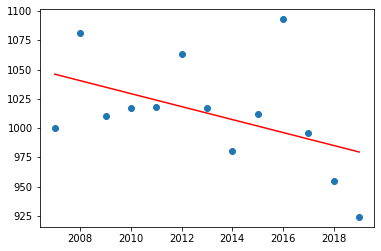

In [74]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

There's not many points for our linear regression prediction, but it's showning that the number of goals is on a downwards trends.

### Lionel Messi (LaLiga top scorer for 2019) Linear Regression

In [75]:
df_messi_data = df_laliga_years[df_laliga_years["Name"] == "Lionel Messi"].reset_index(drop=True)
df_messi_data

,Name,Team,Position,Appearances,Goals,Assists,Yellow,Yellow-Red,Red,Year
0,Lionel Messi,Barcelona,Forward,28,10,0,2,0,0,2007
1,Lionel Messi,Barcelona,Forward,31,23,6,2,0,0,2008
2,Lionel Messi,Barcelona,Forward,35,34,8,3,0,0,2009
3,Lionel Messi,Barcelona,Forward,33,31,17,3,0,0,2010
4,Lionel Messi,Barcelona,Forward,37,50,17,6,0,0,2011
5,Lionel Messi,Barcelona,Forward,32,46,12,1,0,0,2012
6,Lionel Messi,Barcelona,Forward,31,28,9,2,0,0,2013
7,Lionel Messi,Barcelona,Forward,38,43,19,4,0,0,2014
8,Lionel Messi,Barcelona,Forward,33,26,16,3,0,0,2015
9,Lionel Messi,Barcelona,Forward,34,37,9,6,0,0,2016


In [76]:
df_messi_goals = df_messi_data.drop(['Name','Team','Position','Appearances','Assists','Yellow','Yellow-Red','Red'], axis=1)
df_messi_goals.Goals = df_messi_goals.Goals.astype(float)
df_messi_goals.Year = df_messi_goals.Year.astype(float)
df_messi_goals

,Goals,Year
0,10.0,2007.0
1,23.0,2008.0
2,34.0,2009.0
3,31.0,2010.0
4,50.0,2011.0
5,46.0,2012.0
6,28.0,2013.0
7,43.0,2014.0
8,26.0,2015.0
9,37.0,2016.0


In [77]:
X = df_messi_goals.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_messi_goals.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

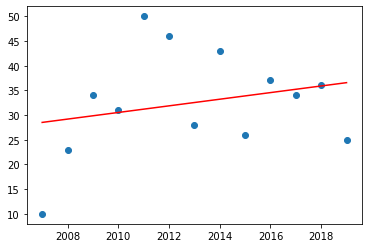

In [78]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

Although there are not many points, we can see that the number of goals for Lionel Messi goes on an upward trend.